# Healthcare Dataset - Comprehensive Exploratory Data Analysis (EDA)

This notebook performs a detailed, reproducible Exploratory Data Analysis (EDA) on the healthcare dataset. All results including plots, summary CSVs, and analysis insights are saved to the `outputs/eda/` directory.

## Analysis Overview:
- **Data Loading & Quality Assessment**
- **Univariate Analysis** (Age, Billing Amount, Categorical Variables)
- **Bivariate Analysis** (Relationships between variables)
- **Temporal Patterns** (Admission trends, Length of Stay)
- **Outlier Detection** (High billing analysis)
- **Missing Data Assessment** (Handling strategies)
- **Comprehensive Insights Summary**

---

## 1. Environment Setup and Dependencies

First, we'll import all required libraries and create the output directory structure for saving our EDA artifacts.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")

# Get project root directory (parent of notebooks-01)
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent

# Create output directory structure in project root
output_dir = project_root / "outputs" / "eda"
output_dir.mkdir(parents=True, exist_ok=True)

print("Environment setup complete!")
print(f"Project root: {project_root}")
print(f"Output directory: {output_dir.absolute()}")
print("Python libraries imported successfully")

Environment setup complete!
Project root: /Users/kxshrx/asylum/healix
Output directory: /Users/kxshrx/asylum/healix/outputs/eda
Python libraries imported successfully


## 2. Data Loading and Initial Inspection

Load the healthcare dataset with auto-encoding detection and perform initial data inspection.

In [2]:
# Load the healthcare dataset
dataset_path = project_root / "healthcare_dataset.csv"

print(f"Loading healthcare dataset from: {dataset_path}")

try:
    # Load the dataset
    df = pd.read_csv(dataset_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
except FileNotFoundError:
    print(f"Error: File '{dataset_path}' not found!")
    print("Please ensure the healthcare dataset is in the project root directory.")
    
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display basic information
if 'df' in locals():
    print("\n" + "="*50)
    print("DATASET OVERVIEW")
    print("="*50)
    print(f"Rows: {df.shape[0]:,}")
    print(f"Columns: {df.shape[1]}")
    print(f"Total Data Points: {df.size:,}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Show column data types
    print(f"\nColumn Data Types:")
    for col, dtype in df.dtypes.items():
        print(f"  {col}: {dtype}")
        
    # Show first few rows
    print(f"\nFirst 3 rows:")
    print(df.head(3).to_string())
    
    print("\n" + "="*50)

Loading healthcare dataset from: /Users/kxshrx/asylum/healix/healthcare_dataset.csv
Dataset loaded successfully!
Shape: (55500, 15)
Columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

DATASET OVERVIEW
Rows: 55,500
Columns: 15
Total Data Points: 832,500
Memory Usage: 38.33 MB

Column Data Types:
  Name: object
  Age: int64
  Gender: object
  Blood Type: object
  Medical Condition: object
  Date of Admission: object
  Doctor: object
  Hospital: object
  Insurance Provider: object
  Billing Amount: float64
  Room Number: int64
  Admission Type: object
  Discharge Date: object
  Medication: object
  Test Results: object

First 3 rows:
            Name  Age  Gender Blood Type Medical Condition Date of Admission            Doctor         Hospital Insurance Provider  Billing Amount  Room Number Admission Type Dis

In [3]:
# Initial data inspection
if df is not None:
    print("INITIAL DATA INSPECTION")
    print("=" * 50)
    
    # Basic information
    print(f"Dataset Shape: {df.shape}")
    print(f"Total Patients: {df.shape[0]:,}")
    print(f"Total Features: {df.shape[1]}")
    
    print("\nColumn Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    
    print(f"\nData Types:")
    print(df.dtypes.to_string())
    
    print(f"\nFirst 5 rows:")
    display(df.head())
    
    print(f"\nLast 5 rows:")
    display(df.tail())

INITIAL DATA INSPECTION
Dataset Shape: (55500, 15)
Total Patients: 55,500
Total Features: 15

Column Names:
   1. Name
   2. Age
   3. Gender
   4. Blood Type
   5. Medical Condition
   6. Date of Admission
   7. Doctor
   8. Hospital
   9. Insurance Provider
  10. Billing Amount
  11. Room Number
  12. Admission Type
  13. Discharge Date
  14. Medication
  15. Test Results

Data Types:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object

First 5 rows:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal



Last 5 rows:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


## 3. Dataset Summary and Quality Assessment

Comprehensive analysis of data quality including missing values, duplicates, and summary statistics.

In [4]:
def analyze_data_quality(df, output_dir):
    """
    Comprehensive data quality analysis including missing values and duplicates.
    
    Args:
        df (DataFrame): Input dataset
        output_dir (Path): Directory to save analysis results
    """
    if df is None:
        return
    
    print("DATA QUALITY ANALYSIS")
    print("=" * 50)
    
    # Missing values analysis
    print("\nMissing Values Analysis:")
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_counts.values,
        'Missing_Percentage': missing_percentages.values
    }).sort_values('Missing_Percentage', ascending=False)
    
    print(missing_summary.to_string(index=False))
    
    # Save missing values summary
    missing_summary.to_csv(output_dir / "missing_values_summary.csv", index=False)
    print(f"\nMissing values summary saved to: {output_dir / 'missing_values_summary.csv'}")
    
    # Duplicate analysis
    print(f"\nDuplicate Analysis:")
    total_duplicates = df.duplicated().sum()
    duplicate_percentage = (total_duplicates / len(df)) * 100
    
    print(f"   Total duplicate rows: {total_duplicates:,} ({duplicate_percentage:.2f}%)")
    
    if total_duplicates > 0:
        print(f"\nSample duplicate rows:")
        duplicate_rows = df[df.duplicated(keep=False)].head(10)
        display(duplicate_rows)
        
        # Save duplicate rows
        df[df.duplicated(keep=False)].to_csv(output_dir / "duplicate_rows.csv", index=False)
        print(f"Duplicate rows saved to: {output_dir / 'duplicate_rows.csv'}")
    
    # Basic statistics for numerical columns
    print(f"\nNumerical Columns Summary:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        numerical_summary = df[numerical_cols].describe()
        display(numerical_summary)
        
        # Save numerical summary
        numerical_summary.to_csv(output_dir / "numerical_summary.csv")
        print(f"Numerical summary saved to: {output_dir / 'numerical_summary.csv'}")
    
    return missing_summary

# Perform data quality analysis
missing_analysis = analyze_data_quality(df, output_dir)

DATA QUALITY ANALYSIS

Missing Values Analysis:
            Column  Missing_Count  Missing_Percentage
              Name              0                 0.0
               Age              0                 0.0
            Gender              0                 0.0
        Blood Type              0                 0.0
 Medical Condition              0                 0.0
 Date of Admission              0                 0.0
            Doctor              0                 0.0
          Hospital              0                 0.0
Insurance Provider              0                 0.0
    Billing Amount              0                 0.0
       Room Number              0                 0.0
    Admission Type              0                 0.0
    Discharge Date              0                 0.0
        Medication              0                 0.0
      Test Results              0                 0.0

Missing values summary saved to: /Users/kxshrx/asylum/healix/outputs/eda/missing_values

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
64,Nancy glOVeR,58,Male,A-,Hypertension,2020-05-08,Jennifer Larson,"Khan, and Rodriguez Fischer",Medicare,19183.168885,378,Emergency,2020-06-01,Aspirin,Abnormal
107,DAVid higgInS,49,Female,B-,Arthritis,2021-03-05,Erin Henderson MD,"Evans and Hall Schneider,",Medicare,24948.477824,361,Emergency,2021-03-20,Penicillin,Abnormal
148,RoBErt hIGGInS,42,Male,AB-,Asthma,2021-05-06,Scott Davis,"and Ford Lee, Rodriguez",Medicare,13355.782085,451,Elective,2021-05-29,Ibuprofen,Inconclusive
154,kevIn HiCKs,66,Male,AB+,Arthritis,2021-06-23,Kelly Murphy,Robinson Inc,Medicare,1897.891727,196,Elective,2021-07-09,Ibuprofen,Abnormal
159,miCHAeL TayloR,29,Male,O-,Asthma,2020-02-27,Erica Mccormick,Donaldson-Frey,Medicare,41939.119937,453,Elective,2020-03-26,Ibuprofen,Normal
246,wiLlIAm mcCOY,80,Male,A-,Asthma,2023-02-20,Whitney Vaughan,"and Walker Glenn, Long",Cigna,3845.397496,158,Emergency,2023-03-10,Penicillin,Normal
360,tHOMas DENnIs,40,Male,A+,Asthma,2024-01-28,Leonard Chen,Mckinney-Edwards,Medicare,42959.299814,410,Elective,2024-02-21,Paracetamol,Abnormal
408,MelIssA hOFfMAN,36,Male,B+,Cancer,2022-07-27,April Cummings,Cooley-Reid,Cigna,41311.293901,434,Emergency,2022-08-19,Lipitor,Inconclusive
454,jOrdan LEON,51,Female,O+,Arthritis,2023-08-11,Christina Lopez,Dennis-Roth,Cigna,21534.715570,198,Emergency,2023-08-20,Penicillin,Normal
621,JesSIcA caRtER,51,Female,A-,Obesity,2019-12-08,Sarah Ibarra,Anderson Group,Cigna,32006.031566,200,Urgent,2020-01-05,Penicillin,Normal


Duplicate rows saved to: /Users/kxshrx/asylum/healix/outputs/eda/duplicate_rows.csv

Numerical Columns Summary:


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Numerical summary saved to: /Users/kxshrx/asylum/healix/outputs/eda/numerical_summary.csv


## 4. Univariate Analysis

Individual analysis of key variables including Age, Billing Amount, and categorical variables.

AGE ANALYSIS
Age Statistics:
count    55500.000000
mean        51.539459
std         19.602454
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000


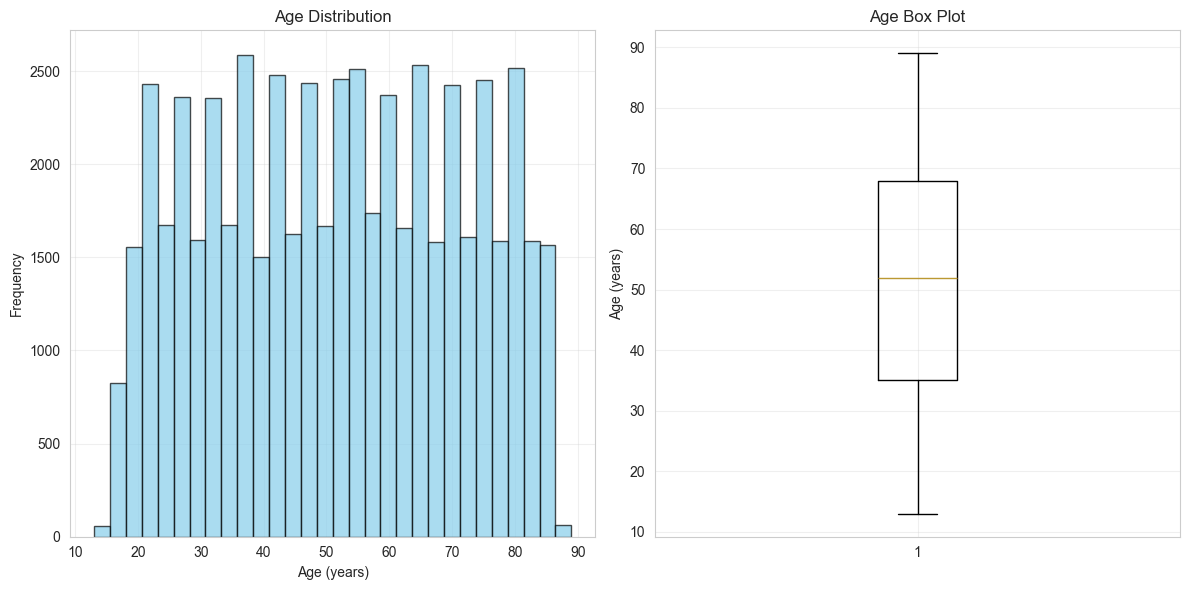


Age analysis saved to: /Users/kxshrx/asylum/healix/outputs/eda/age_distribution.png
Age statistics saved to: /Users/kxshrx/asylum/healix/outputs/eda/age_statistics.csv


In [5]:
def analyze_age_distribution(df, output_dir):
    """Analyze age distribution with histogram and statistics."""
    if df is None or 'Age' not in df.columns:
        return
    
    print("AGE ANALYSIS")
    print("=" * 30)
    
    # Age statistics
    age_stats = df['Age'].describe()
    print("Age Statistics:")
    print(age_stats.to_string())
    
    # Age histogram
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(df['Age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age (years)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Age box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df['Age'].dropna())
    plt.title('Age Box Plot')
    plt.ylabel('Age (years)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_dir / "age_distribution.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save age statistics
    age_stats.to_csv(output_dir / "age_statistics.csv", header=['Value'])
    print(f"\nAge analysis saved to: {output_dir / 'age_distribution.png'}")
    print(f"Age statistics saved to: {output_dir / 'age_statistics.csv'}")

# Analyze age distribution
analyze_age_distribution(df, output_dir)


BILLING AMOUNT ANALYSIS
Billing Amount Statistics:
count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736


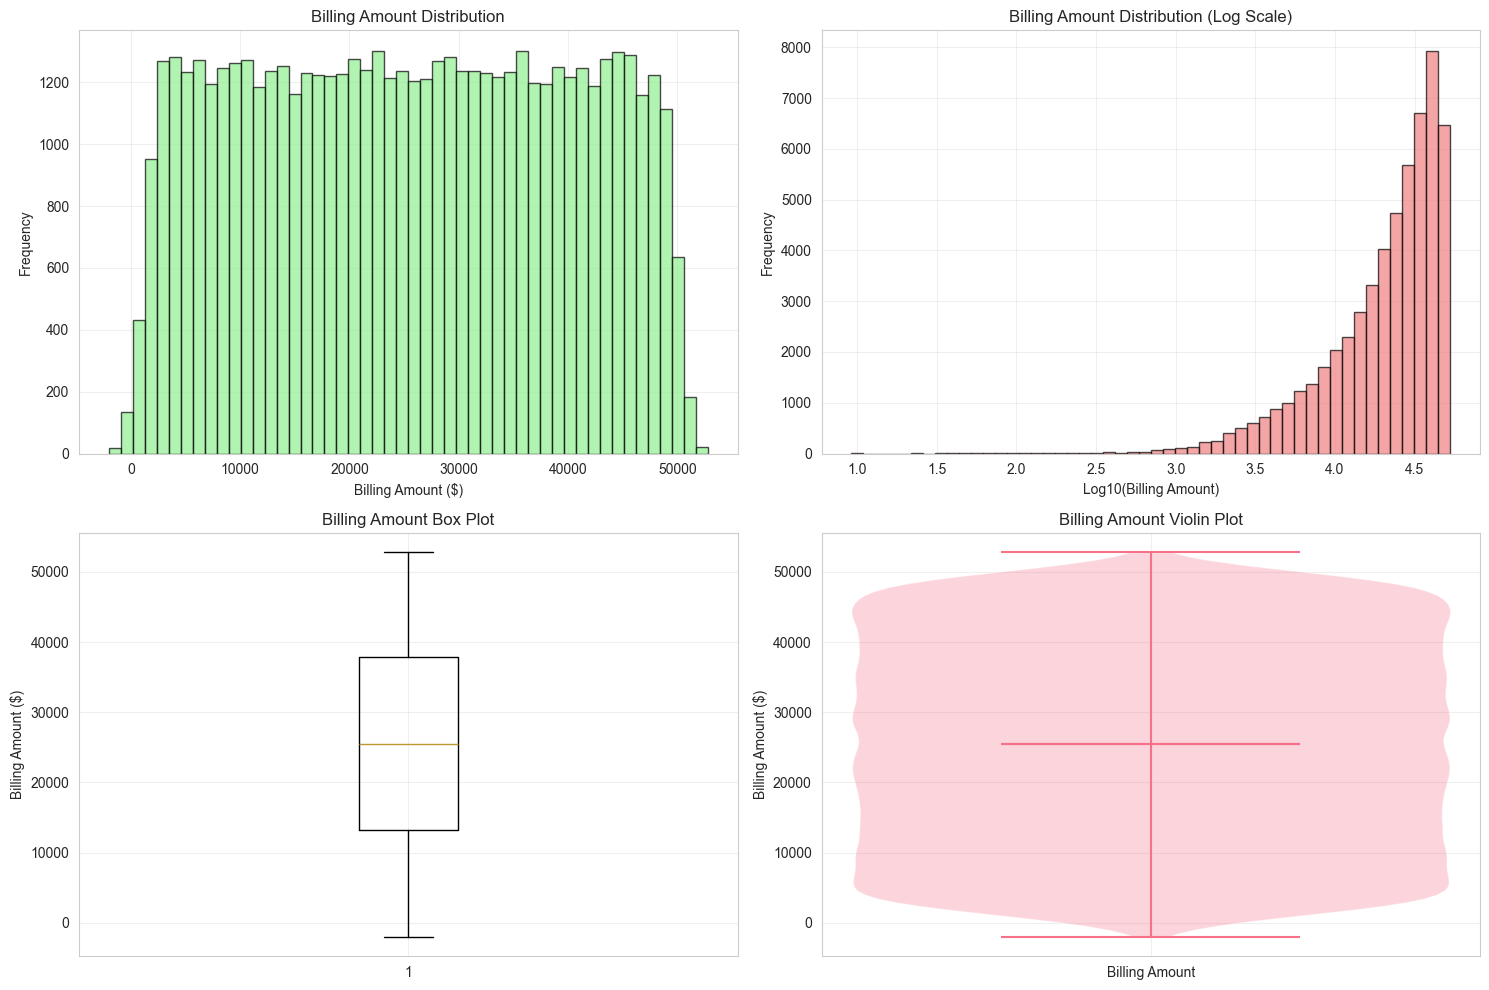


Additional Billing Statistics:
   Skewness: -0.001
   Kurtosis: -1.191
   Range: $-2,008.49 - $52,764.28
   IQR: $24,579.28

Billing analysis saved to: /Users/kxshrx/asylum/healix/outputs/eda/billing_amount_analysis.png
Billing statistics saved to: /Users/kxshrx/asylum/healix/outputs/eda/billing_amount_statistics.csv


In [6]:
def analyze_billing_amount(df, output_dir):
    """Analyze billing amount distribution with regular and log-scale histograms."""
    if df is None or 'Billing Amount' not in df.columns:
        return
    
    print("\nBILLING AMOUNT ANALYSIS")
    print("=" * 35)
    
    # Clean billing amount data
    billing_clean = df['Billing Amount'].dropna()
    
    # Billing statistics
    billing_stats = billing_clean.describe()
    print("Billing Amount Statistics:")
    print(billing_stats.to_string())
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Regular histogram
    plt.subplot(2, 2, 1)
    plt.hist(billing_clean, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Billing Amount Distribution')
    plt.xlabel('Billing Amount ($)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Log-scale histogram (if data is skewed)
    plt.subplot(2, 2, 2)
    log_billing = np.log10(billing_clean[billing_clean > 0])
    plt.hist(log_billing, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.title('Billing Amount Distribution (Log Scale)')
    plt.xlabel('Log10(Billing Amount)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(2, 2, 3)
    plt.boxplot(billing_clean)
    plt.title('Billing Amount Box Plot')
    plt.ylabel('Billing Amount ($)')
    plt.grid(True, alpha=0.3)
    
    # Violin plot
    plt.subplot(2, 2, 4)
    parts = plt.violinplot([billing_clean], positions=[1], showmeans=True, showmedians=True)
    plt.title('Billing Amount Violin Plot')
    plt.ylabel('Billing Amount ($)')
    plt.xticks([1], ['Billing Amount'])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_dir / "billing_amount_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Additional statistics
    print(f"\nAdditional Billing Statistics:")
    print(f"   Skewness: {billing_clean.skew():.3f}")
    print(f"   Kurtosis: {billing_clean.kurtosis():.3f}")
    print(f"   Range: ${billing_clean.min():,.2f} - ${billing_clean.max():,.2f}")
    print(f"   IQR: ${billing_clean.quantile(0.75) - billing_clean.quantile(0.25):,.2f}")
    
    # Save billing statistics
    billing_stats.to_csv(output_dir / "billing_amount_statistics.csv", header=['Value'])
    print(f"\nBilling analysis saved to: {output_dir / 'billing_amount_analysis.png'}")
    print(f"Billing statistics saved to: {output_dir / 'billing_amount_statistics.csv'}")

# Analyze billing amount distribution
analyze_billing_amount(df, output_dir)


CATEGORICAL VARIABLES ANALYSIS

INSURANCE PROVIDER ANALYSIS:
------------------------------
   Total unique values: 5
   Top values:
       1. Cigna: 11,249 (20.27%)
       2. Medicare: 11,154 (20.10%)
       3. UnitedHealthcare: 11,125 (20.05%)
       4. Blue Cross: 11,059 (19.93%)
       5. Aetna: 10,913 (19.66%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/insurance_provider_counts.csv


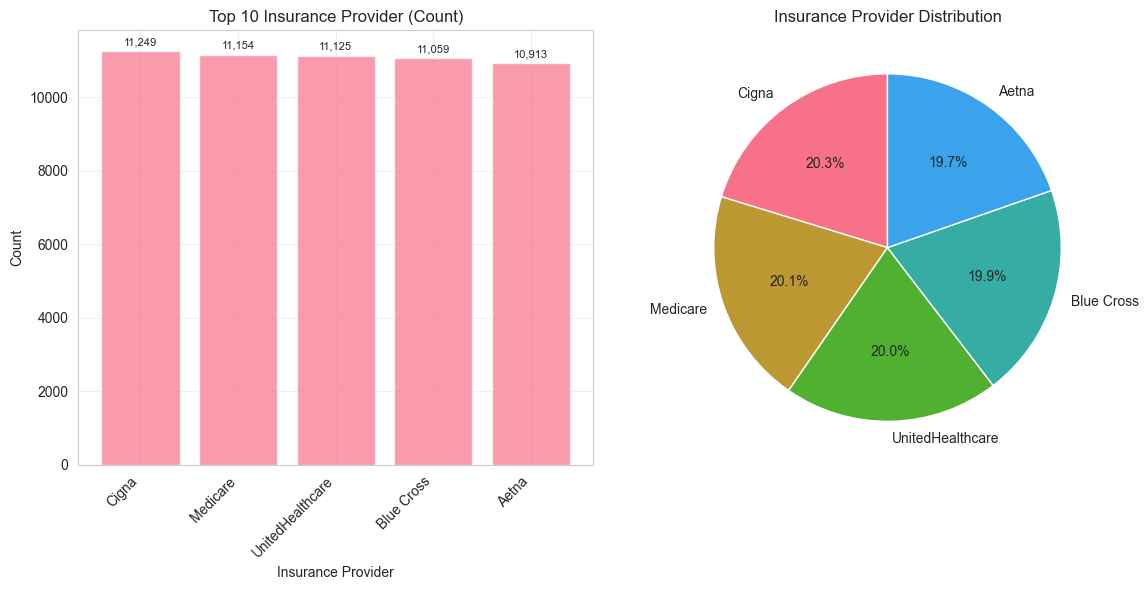

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/insurance_provider_distribution.png

ADMISSION TYPE ANALYSIS:
------------------------------
   Total unique values: 3
   Top values:
       1. Elective: 18,655 (33.61%)
       2. Urgent: 18,576 (33.47%)
       3. Emergency: 18,269 (32.92%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/admission_type_counts.csv


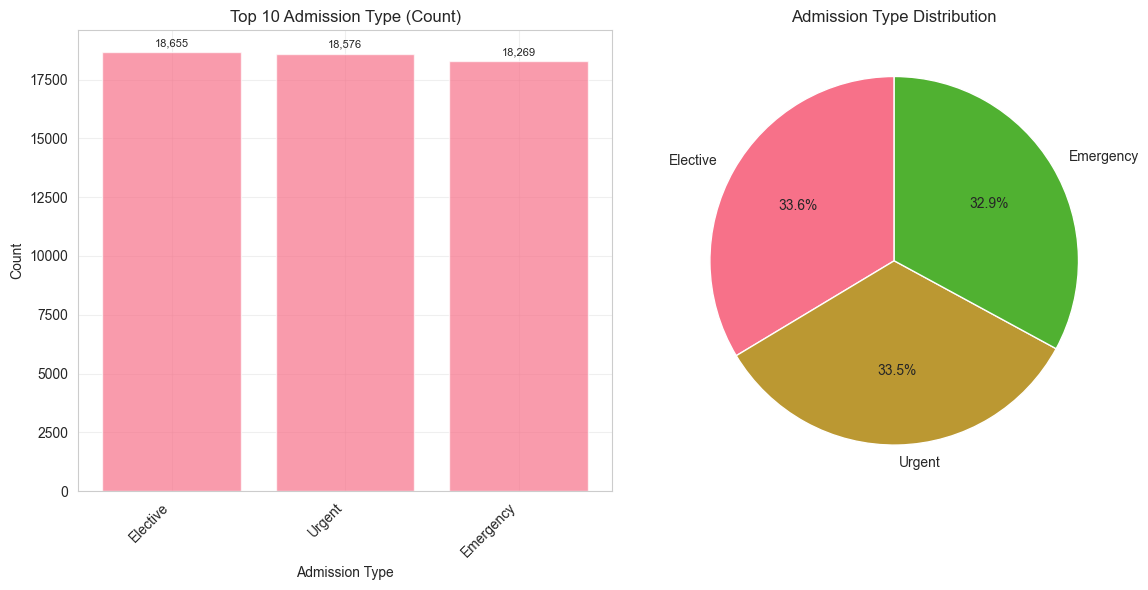

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/admission_type_distribution.png

MEDICAL CONDITION ANALYSIS:
------------------------------
   Total unique values: 6
   Top values:
       1. Arthritis: 9,308 (16.77%)
       2. Diabetes: 9,304 (16.76%)
       3. Hypertension: 9,245 (16.66%)
       4. Obesity: 9,231 (16.63%)
       5. Cancer: 9,227 (16.63%)
       6. Asthma: 9,185 (16.55%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/medical_condition_counts.csv


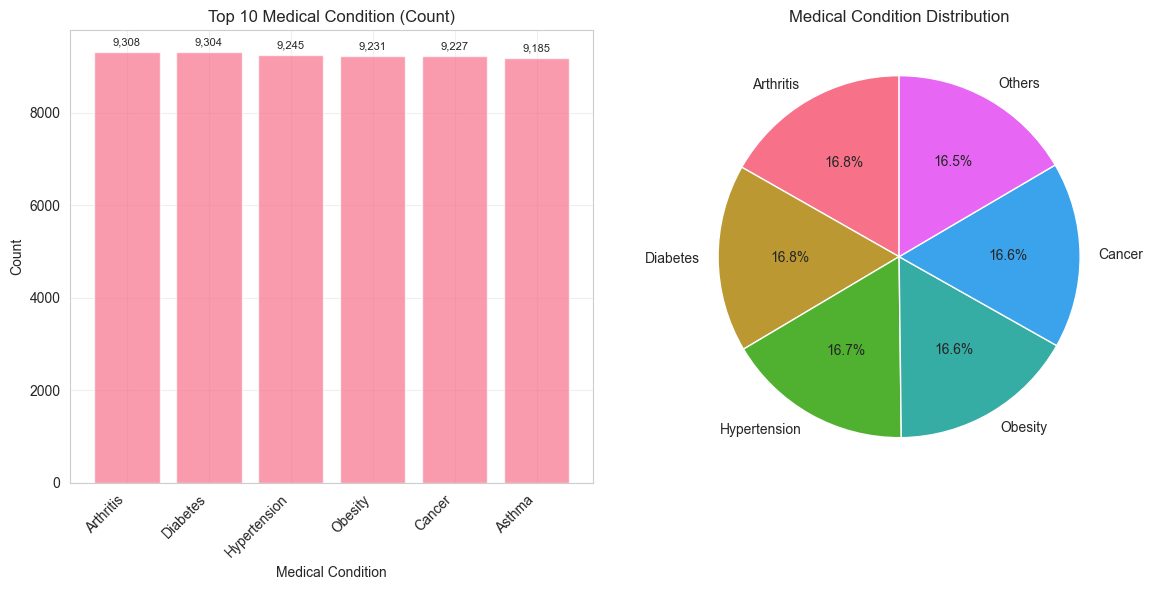

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/medical_condition_distribution.png

MEDICATION ANALYSIS:
------------------------------
   Total unique values: 5
   Top values:
       1. Lipitor: 11,140 (20.07%)
       2. Ibuprofen: 11,127 (20.05%)
       3. Aspirin: 11,094 (19.99%)
       4. Paracetamol: 11,071 (19.95%)
       5. Penicillin: 11,068 (19.94%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/medication_counts.csv


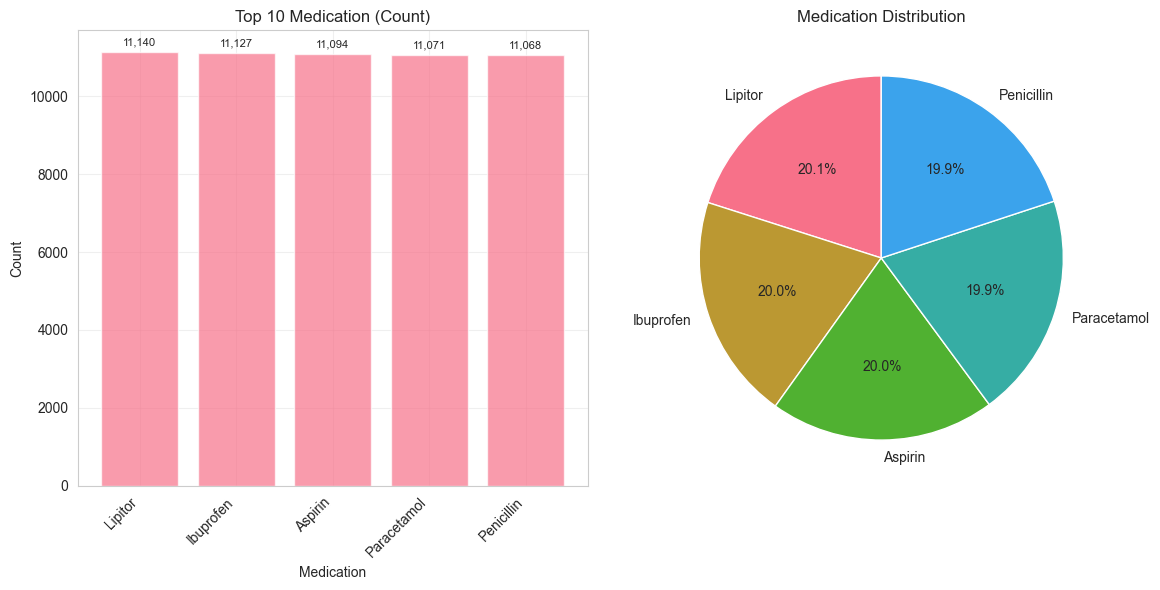

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/medication_distribution.png

TEST RESULTS ANALYSIS:
------------------------------
   Total unique values: 3
   Top values:
       1. Abnormal: 18,627 (33.56%)
       2. Normal: 18,517 (33.36%)
       3. Inconclusive: 18,356 (33.07%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/test_results_counts.csv


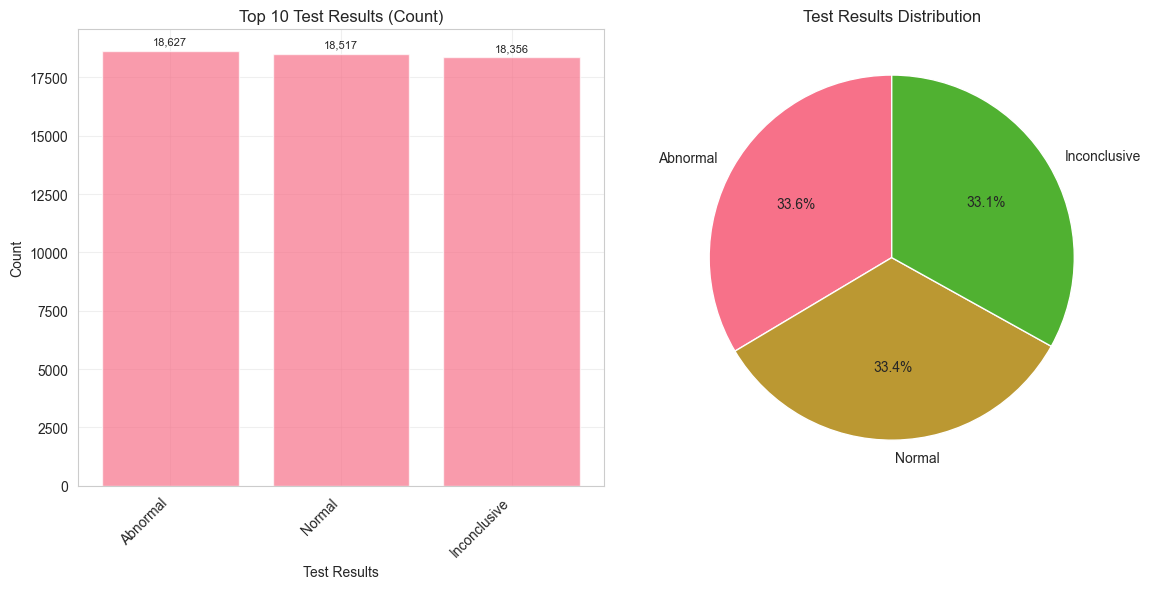

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/test_results_distribution.png

GENDER ANALYSIS:
------------------------------
   Total unique values: 2
   Top values:
       1. Male: 27,774 (50.04%)
       2. Female: 27,726 (49.96%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/gender_counts.csv


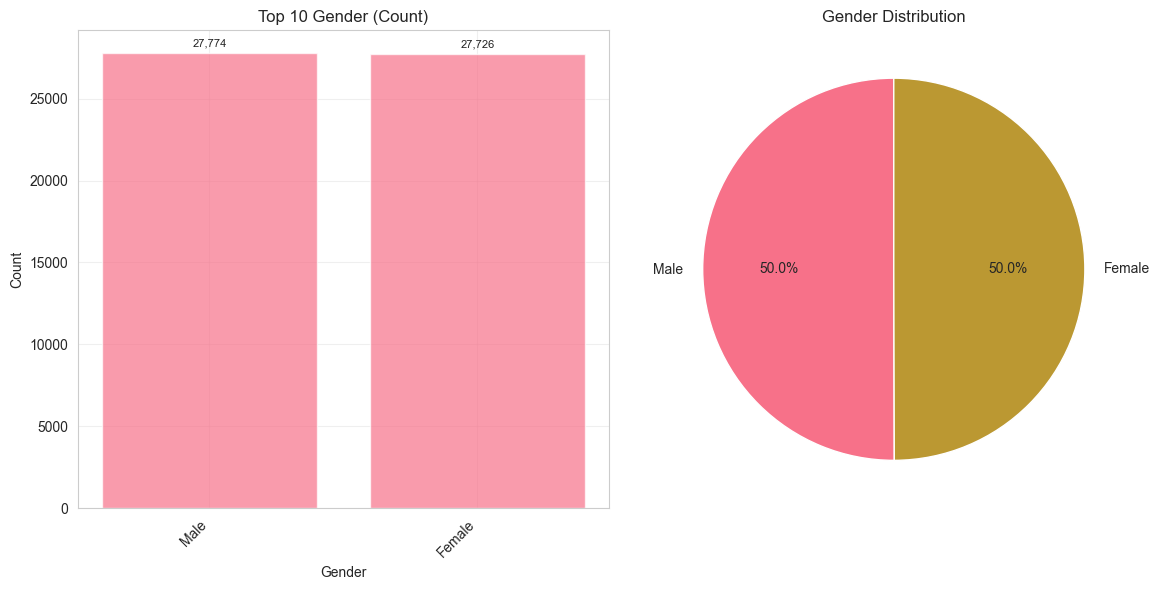

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/gender_distribution.png

BLOOD TYPE ANALYSIS:
------------------------------
   Total unique values: 8
   Top values:
       1. A-: 6,969 (12.56%)
       2. A+: 6,956 (12.53%)
       3. AB+: 6,947 (12.52%)
       4. AB-: 6,945 (12.51%)
       5. B+: 6,945 (12.51%)
       6. B-: 6,944 (12.51%)
       7. O+: 6,917 (12.46%)
       8. O-: 6,877 (12.39%)
   Saved to: /Users/kxshrx/asylum/healix/outputs/eda/blood_type_counts.csv


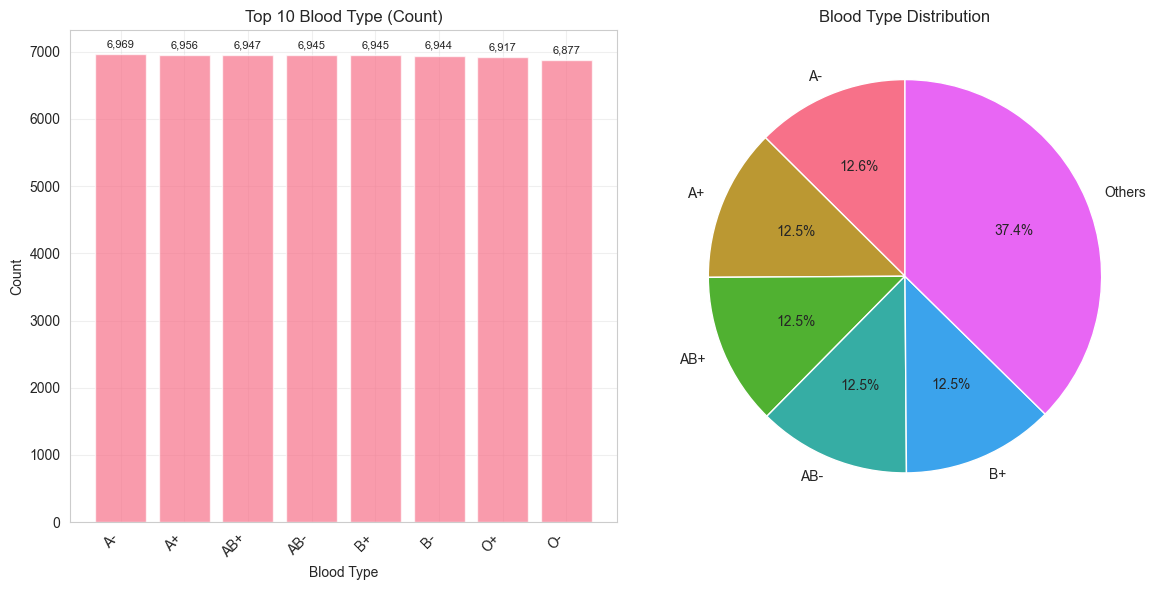

   Plot saved to: /Users/kxshrx/asylum/healix/outputs/eda/blood_type_distribution.png


In [7]:
def analyze_categorical_variables(df, output_dir):
    """Analyze categorical variables and save top counts to CSV files."""
    if df is None:
        return
    
    print("\nCATEGORICAL VARIABLES ANALYSIS")
    print("=" * 40)
    
    # Define categorical columns to analyze
    categorical_cols = ['Insurance Provider', 'Admission Type', 'Medical Condition', 
                       'Medication', 'Test Results', 'Gender', 'Blood Type']
    
    # Filter existing columns
    existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
    
    for col in existing_categorical_cols:
        print(f"\n{col.upper()} ANALYSIS:")
        print("-" * 30)
        
        # Value counts
        value_counts = df[col].value_counts().head(20)  # Top 20
        total_unique = df[col].nunique()
        
        print(f"   Total unique values: {total_unique}")
        print(f"   Top values:")
        
        for idx, (value, count) in enumerate(value_counts.head(10).items(), 1):
            percentage = (count / len(df)) * 100
            print(f"      {idx:2d}. {value}: {count:,} ({percentage:.2f}%)")
        
        # Save to CSV
        value_counts_df = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Percentage': (value_counts.values / len(df)) * 100
        })
        
        filename = f"{col.lower().replace(' ', '_')}_counts.csv"
        value_counts_df.to_csv(output_dir / filename, index=False)
        print(f"   Saved to: {output_dir / filename}")
        
        # Create visualization for top categories
        if len(value_counts) > 1:
            plt.figure(figsize=(12, 6))
            
            # Bar plot
            plt.subplot(1, 2, 1)
            top_10 = value_counts.head(10)
            bars = plt.bar(range(len(top_10)), top_10.values, alpha=0.7)
            plt.title(f'Top 10 {col} (Count)')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(range(len(top_10)), top_10.index, rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
            
            # Add value labels on bars
            for i, bar in enumerate(bars):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(top_10.values),
                        f'{top_10.values[i]:,}', ha='center', va='bottom', fontsize=8)
            
            # Pie chart for top 5
            plt.subplot(1, 2, 2)
            top_5 = value_counts.head(5)
            others_count = value_counts.iloc[5:].sum() if len(value_counts) > 5 else 0
            
            if others_count > 0:
                pie_data = list(top_5.values) + [others_count]
                pie_labels = list(top_5.index) + ['Others']
            else:
                pie_data = top_5.values
                pie_labels = top_5.index
            
            plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} Distribution')
            
            plt.tight_layout()
            plot_filename = f"{col.lower().replace(' ', '_')}_distribution.png"
            plt.savefig(output_dir / plot_filename, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"   Plot saved to: {output_dir / plot_filename}")

# Analyze categorical variables
analyze_categorical_variables(df, output_dir)

## 5. Bivariate Analysis

Explore relationships between variables using boxplots, correlation analysis, and cross-tabulations.

BILLING AMOUNT BY CATEGORIES

Billing Amount by Insurance Provider:
                        mean    median       std  count
Insurance Provider                                     
Medicare            25615.99  25592.81  14142.48  11154
Blue Cross          25613.01  25594.70  14113.62  11059
Aetna               25553.29  25786.39  14269.23  10913
Cigna               25525.77  25545.20  14241.21  11249
UnitedHealthcare    25389.17  25185.49  14291.57  11125

Billing Amount by Admission Type:

Billing Amount by Admission Type:
                    mean    median       std  count
Admission Type                                     
Elective        25602.23  25656.93  14228.28  18655
Urgent          25517.36  25550.37  14242.63  18576
Emergency       25497.40  25379.57  14163.01  18269
                    mean    median       std  count
Admission Type                                     
Elective        25602.23  25656.93  14228.28  18655
Urgent          25517.36  25550.37  14242.63  18576
Em

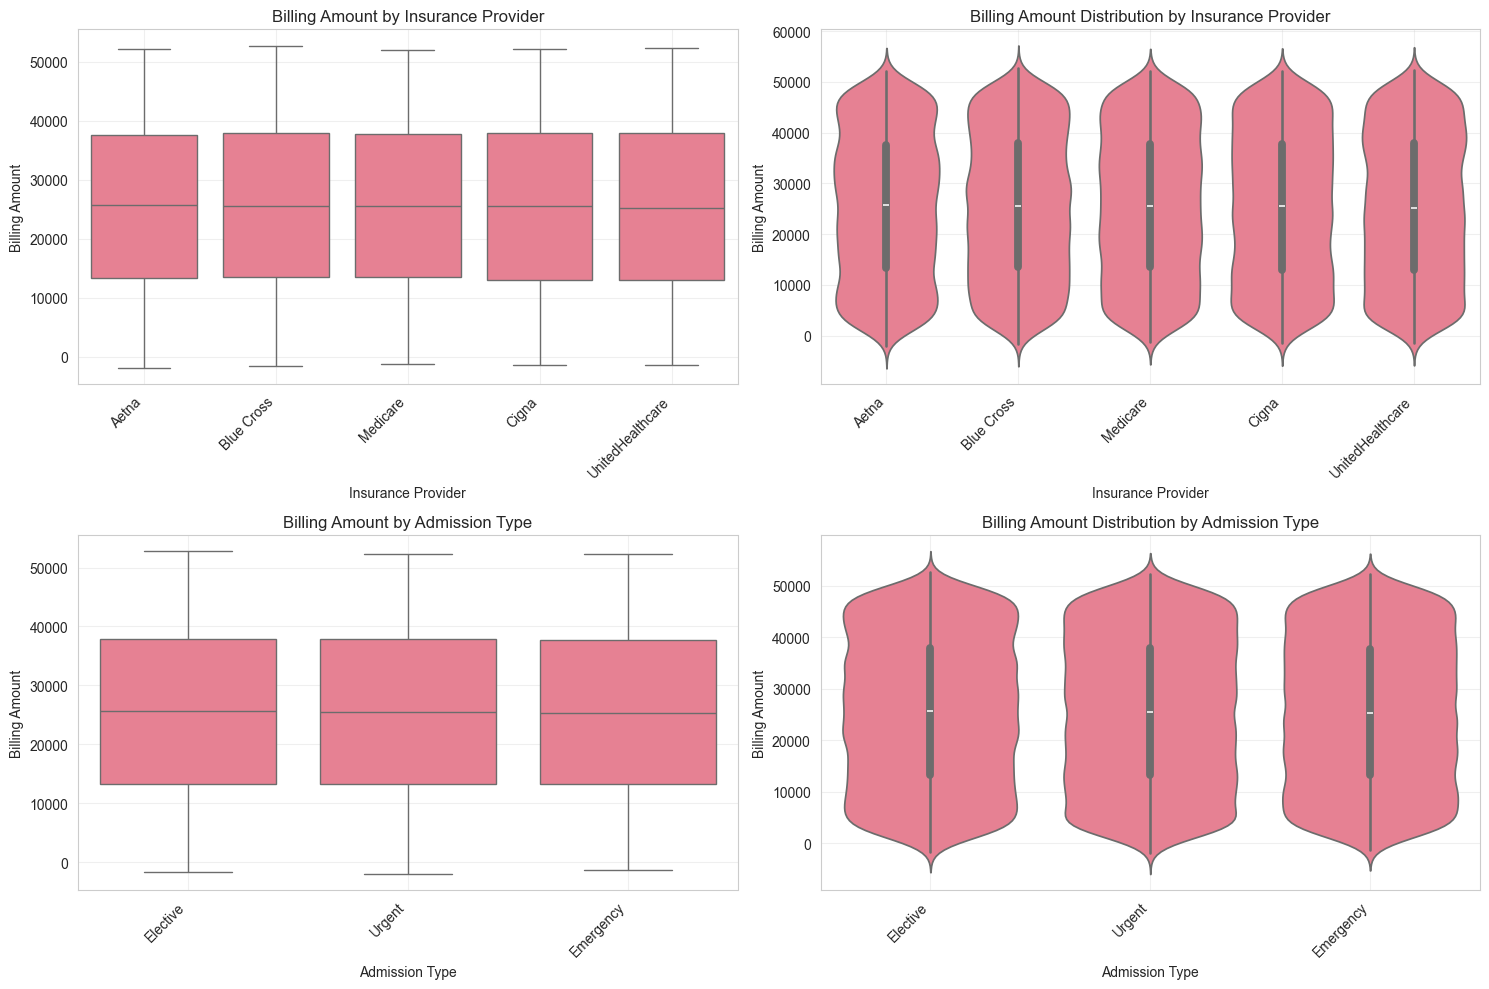

Analysis saved to: /Users/kxshrx/asylum/healix/outputs/eda/billing_by_categories.png


In [8]:
def analyze_billing_by_categories(df, output_dir):
    """Analyze billing amount by categorical variables."""
    if df is None or 'Billing Amount' not in df.columns:
        return
    
    print("BILLING AMOUNT BY CATEGORIES")
    print("=" * 40)
    
    # Billing by Insurance Provider
    if 'Insurance Provider' in df.columns:
        print("\nBilling Amount by Insurance Provider:")
        
        plt.figure(figsize=(15, 10))
        
        # Box plot
        plt.subplot(2, 2, 1)
        insurance_order = df.groupby('Insurance Provider')['Billing Amount'].median().sort_values(ascending=False).index
        sns.boxplot(data=df, x='Insurance Provider', y='Billing Amount', order=insurance_order)
        plt.title('Billing Amount by Insurance Provider')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        # Violin plot
        plt.subplot(2, 2, 2)
        sns.violinplot(data=df, x='Insurance Provider', y='Billing Amount', order=insurance_order)
        plt.title('Billing Amount Distribution by Insurance Provider')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        # Summary statistics by insurance provider
        insurance_stats = df.groupby('Insurance Provider')['Billing Amount'].agg(['mean', 'median', 'std', 'count']).round(2)
        insurance_stats = insurance_stats.sort_values('mean', ascending=False)
        print(insurance_stats.to_string())
        insurance_stats.to_csv(output_dir / "billing_by_insurance_provider.csv")
        
    # Billing by Admission Type
    if 'Admission Type' in df.columns:
        print(f"\nBilling Amount by Admission Type:")
        
        plt.subplot(2, 2, 3)
        admission_order = df.groupby('Admission Type')['Billing Amount'].median().sort_values(ascending=False).index
        sns.boxplot(data=df, x='Admission Type', y='Billing Amount', order=admission_order)
        plt.title('Billing Amount by Admission Type')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(2, 2, 4)
        sns.violinplot(data=df, x='Admission Type', y='Billing Amount', order=admission_order)
        plt.title('Billing Amount Distribution by Admission Type')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        # Summary statistics by admission type
        admission_stats = df.groupby('Admission Type')['Billing Amount'].agg(['mean', 'median', 'std', 'count']).round(2)
        admission_stats = admission_stats.sort_values('mean', ascending=False)
        print(admission_stats.to_string())
        admission_stats.to_csv(output_dir / "billing_by_admission_type.csv")
        
        plt.tight_layout()
        plt.savefig(output_dir / "billing_by_categories.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Analysis saved to: {output_dir / 'billing_by_categories.png'}")

# Analyze billing by categories
analyze_billing_by_categories(df, output_dir)


PIVOT TABLES AND CORRELATION ANALYSIS
Pivot Table: Average Billing by Provider x Admission Type
Admission Type      Elective  Emergency    Urgent
Insurance Provider                               
Aetna               25431.61   25352.77  25895.93
Blue Cross          25628.97   25568.70  25640.44
Cigna               26013.70   25234.38  25334.64
Medicare            25640.45   25596.09  25611.55
UnitedHealthcare    25303.10   25740.17  25137.17


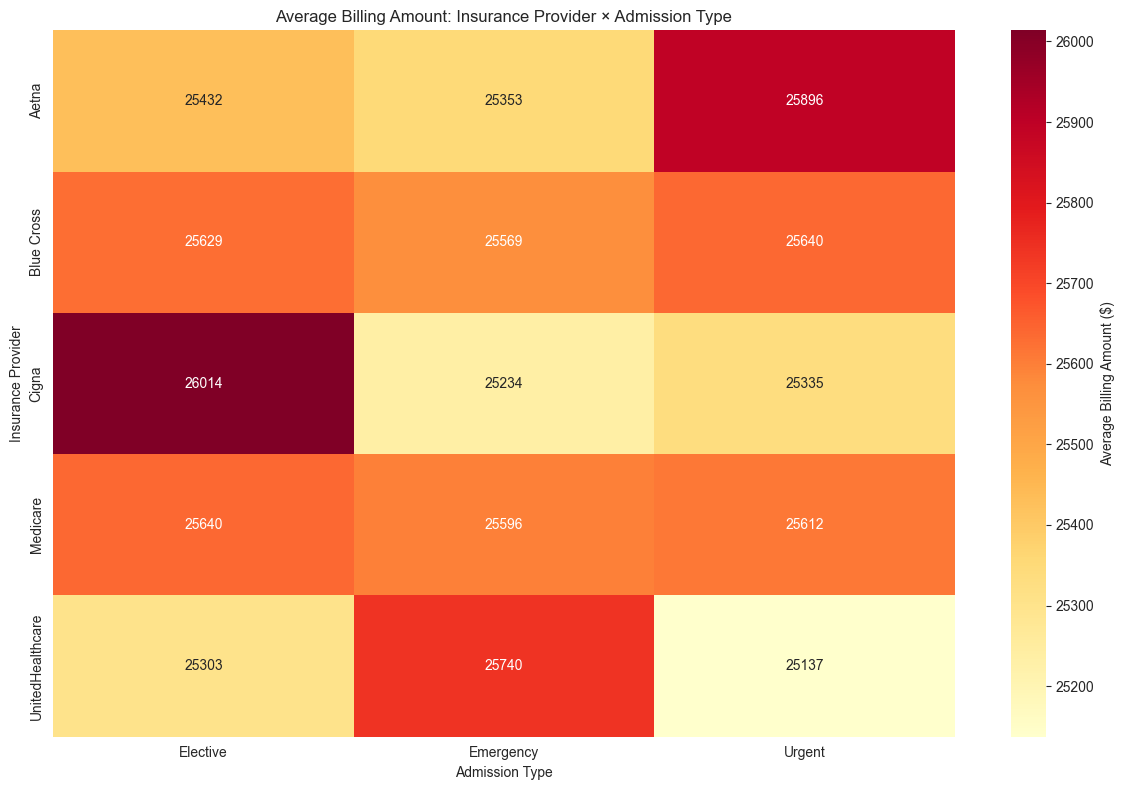

Heatmap saved to: /Users/kxshrx/asylum/healix/outputs/eda/billing_heatmap_provider_admission.png

Correlation Analysis for Numerical Variables:
                     Age  Billing Amount  Room Number
Age             1.000000       -0.003832    -0.000720
Billing Amount -0.003832        1.000000    -0.002943
Room Number    -0.000720       -0.002943     1.000000


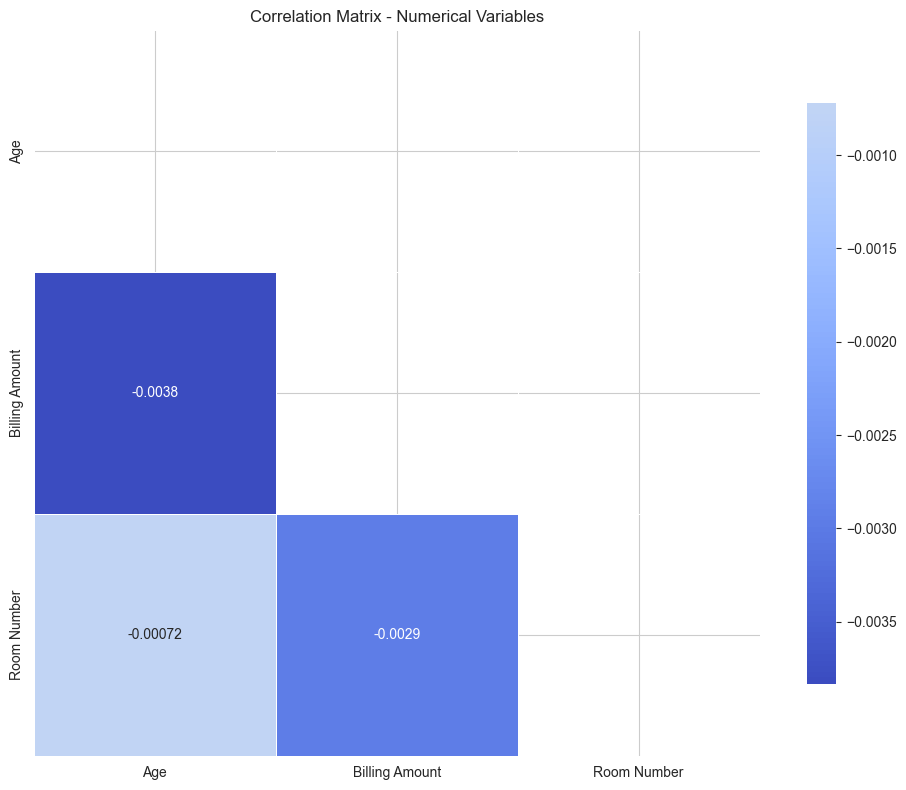

Correlation analysis saved to: /Users/kxshrx/asylum/healix/outputs/eda/correlation_matrix.png
Correlation matrix saved to: /Users/kxshrx/asylum/healix/outputs/eda/correlation_matrix.csv


In [9]:
def create_pivot_analysis(df, output_dir):
    """Create pivot tables and correlation analysis."""
    if df is None:
        return
    
    print("\nPIVOT TABLES AND CORRELATION ANALYSIS")
    print("=" * 45)
    
    # Pivot table: Average billing by Provider x Admission Type
    if 'Insurance Provider' in df.columns and 'Admission Type' in df.columns and 'Billing Amount' in df.columns:
        print("Pivot Table: Average Billing by Provider x Admission Type")
        
        pivot_table = df.pivot_table(
            values='Billing Amount', 
            index='Insurance Provider', 
            columns='Admission Type', 
            aggfunc='mean'
        ).round(2)
        
        print(pivot_table.to_string())
        pivot_table.to_csv(output_dir / "billing_pivot_provider_admission.csv")
        
        # Create heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.0f', 
                   cbar_kws={'label': 'Average Billing Amount ($)'})
        plt.title('Average Billing Amount: Insurance Provider × Admission Type')
        plt.xlabel('Admission Type')
        plt.ylabel('Insurance Provider')
        plt.tight_layout()
        plt.savefig(output_dir / "billing_heatmap_provider_admission.png", dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Heatmap saved to: {output_dir / 'billing_heatmap_provider_admission.png'}")
    
    # Correlation analysis for numerical columns
    print(f"\nCorrelation Analysis for Numerical Variables:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numerical_cols) > 1:
        correlation_matrix = df[numerical_cols].corr()
        print(correlation_matrix.to_string())
        
        # Create correlation heatmap
        plt.figure(figsize=(10, 8))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix - Numerical Variables')
        plt.tight_layout()
        plt.savefig(output_dir / "correlation_matrix.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Save correlation matrix
        correlation_matrix.to_csv(output_dir / "correlation_matrix.csv")
        print(f"Correlation analysis saved to: {output_dir / 'correlation_matrix.png'}")
        print(f"Correlation matrix saved to: {output_dir / 'correlation_matrix.csv'}")

# Create pivot analysis
create_pivot_analysis(df, output_dir)

## 6. Temporal Patterns Analysis

Analyze admission and discharge dates to understand temporal trends and calculate Length of Stay.

TEMPORAL PATTERNS ANALYSIS
Parsed Date of Admission: 55500 valid dates
Parsed Discharge Date: 55500 valid dates

Length of Stay Analysis:
   Valid LOS records: 55,500
   LOS Statistics:
count    55500.000000
mean        15.509009
std          8.659600
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000

Monthly Admission Trends:
   Date range: 2019-05-08 00:00:00 to 2024-05-07 00:00:00
   Total months: 61
Monthly trends saved to: /Users/kxshrx/asylum/healix/outputs/eda/monthly_trends.csv

Yearly Statistics:
                Admission_Count  Billing Amount
Admission_Year                                 
2019                       7387        25700.46
2020                      11285        25392.25
2021                      10931        25629.48
2022                      11017        25513.51
2023                      11026        25573.85
2024                       3854        25380.30

Monthly Admission Trends:
   Date range: 201

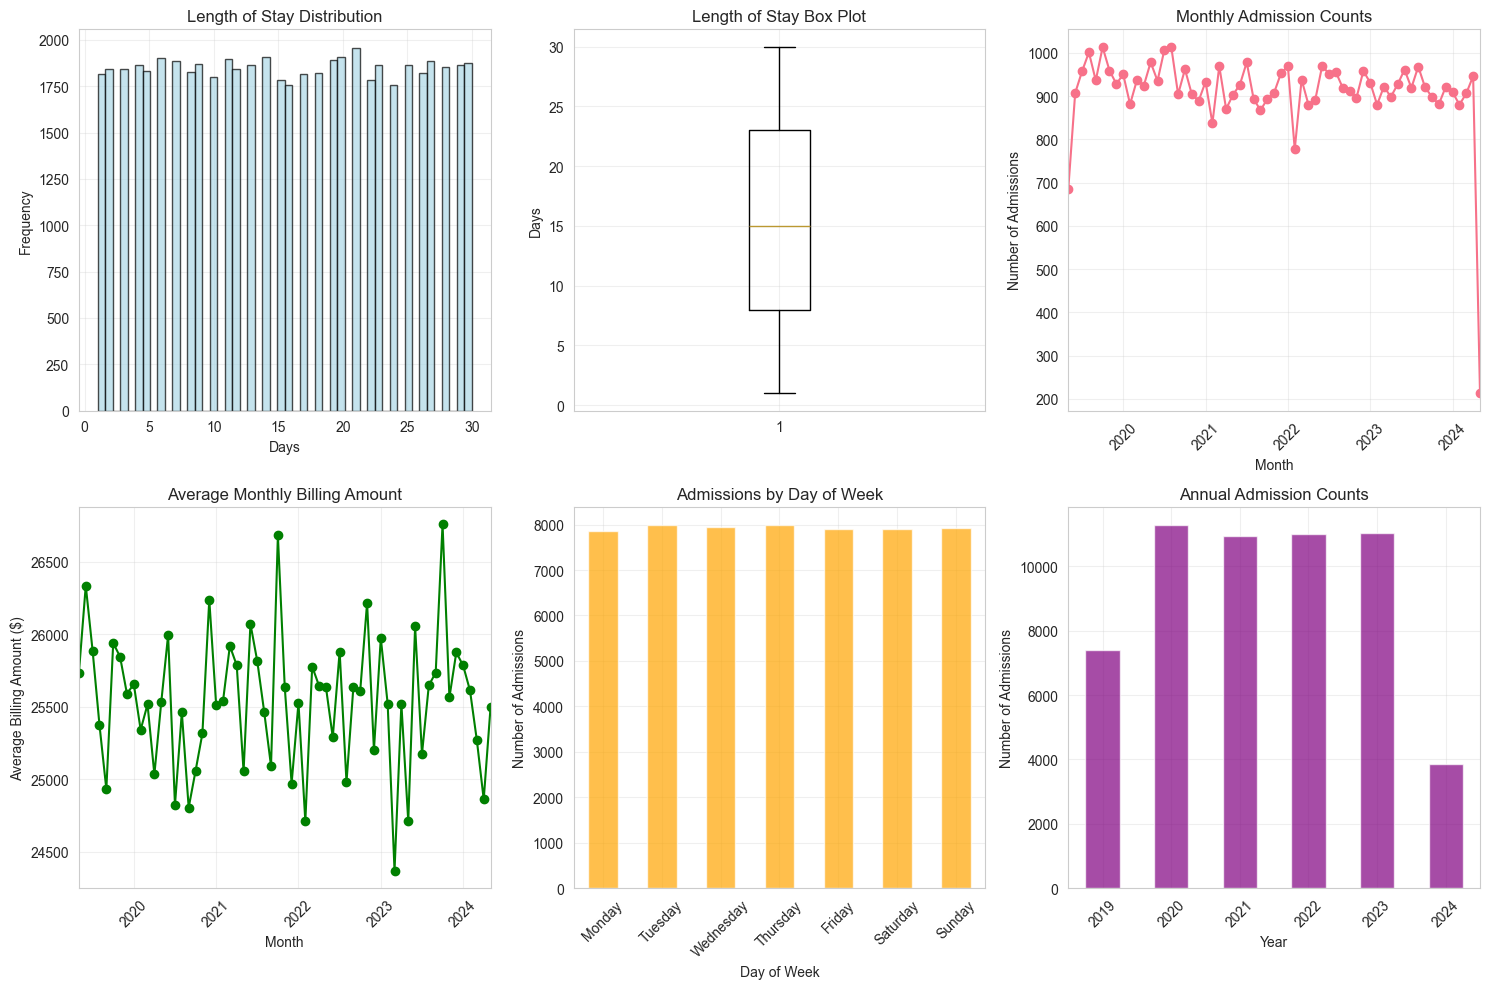

Temporal analysis saved to: /Users/kxshrx/asylum/healix/outputs/eda/temporal_analysis.png


In [10]:
def analyze_temporal_patterns(df, output_dir):
    """Analyze temporal patterns in admissions and calculate Length of Stay."""
    if df is None:
        return
    
    print("TEMPORAL PATTERNS ANALYSIS")
    print("=" * 35)
    
    # Parse date columns
    date_columns = ['Date of Admission', 'Discharge Date']
    existing_date_cols = [col for col in date_columns if col in df.columns]
    
    if not existing_date_cols:
        print("No date columns found for temporal analysis")
        return
    
    # Create a copy for temporal analysis
    df_temporal = df.copy()
    
    for col in existing_date_cols:
        try:
            df_temporal[col] = pd.to_datetime(df_temporal[col], errors='coerce')
            print(f"Parsed {col}: {df_temporal[col].notna().sum()} valid dates")
        except Exception as e:
            print(f"Error parsing {col}: {e}")
    
    # Calculate Length of Stay (LOS)
    if 'Date of Admission' in df_temporal.columns and 'Discharge Date' in df_temporal.columns:
        df_temporal['Length_of_Stay'] = (df_temporal['Discharge Date'] - df_temporal['Date of Admission']).dt.days
        
        # Filter valid LOS (remove negative or extremely large values)
        valid_los = df_temporal['Length_of_Stay'][(df_temporal['Length_of_Stay'] >= 0) & (df_temporal['Length_of_Stay'] <= 365)]
        
        print(f"\nLength of Stay Analysis:")
        print(f"   Valid LOS records: {len(valid_los):,}")
        print(f"   LOS Statistics:")
        los_stats = valid_los.describe()
        print(los_stats.to_string())
        
        # LOS distribution
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 3, 1)
        plt.hist(valid_los, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
        plt.title('Length of Stay Distribution')
        plt.xlabel('Days')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(2, 3, 2)
        plt.boxplot(valid_los)
        plt.title('Length of Stay Box Plot')
        plt.ylabel('Days')
        plt.grid(True, alpha=0.3)
        
        # Save LOS statistics
        los_stats.to_csv(output_dir / "length_of_stay_statistics.csv", header=['Value'])
    
    # Monthly admission trends
    if 'Date of Admission' in df_temporal.columns:
        df_temporal['Admission_Month'] = df_temporal['Date of Admission'].dt.to_period('M')
        monthly_admissions = df_temporal['Admission_Month'].value_counts().sort_index()
        
        print(f"\nMonthly Admission Trends:")
        print(f"   Date range: {df_temporal['Date of Admission'].min()} to {df_temporal['Date of Admission'].max()}")
        print(f"   Total months: {len(monthly_admissions)}")
        
        plt.subplot(2, 3, 3)
        monthly_admissions.plot(kind='line', marker='o')
        plt.title('Monthly Admission Counts')
        plt.xlabel('Month')
        plt.ylabel('Number of Admissions')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Average monthly billing trends
        if 'Billing Amount' in df_temporal.columns:
            monthly_billing = df_temporal.groupby('Admission_Month')['Billing Amount'].mean()
            
            plt.subplot(2, 3, 4)
            monthly_billing.plot(kind='line', marker='o', color='green')
            plt.title('Average Monthly Billing Amount')
            plt.xlabel('Month')
            plt.ylabel('Average Billing Amount ($)')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            
            # Save monthly trends
            monthly_trends = pd.DataFrame({
                'Month': monthly_admissions.index.astype(str),
                'Admission_Count': monthly_admissions.values,
                'Average_Billing': monthly_billing.reindex(monthly_admissions.index).fillna(0).values
            })
            monthly_trends.to_csv(output_dir / "monthly_trends.csv", index=False)
            print(f"Monthly trends saved to: {output_dir / 'monthly_trends.csv'}")
    
    # Day of week patterns
    if 'Date of Admission' in df_temporal.columns:
        df_temporal['Day_of_Week'] = df_temporal['Date of Admission'].dt.day_name()
        day_counts = df_temporal['Day_of_Week'].value_counts()
        
        plt.subplot(2, 3, 5)
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts_ordered = day_counts.reindex(day_order, fill_value=0)
        day_counts_ordered.plot(kind='bar', color='orange', alpha=0.7)
        plt.title('Admissions by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Number of Admissions')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    
    # Year-over-year comparison
    if 'Date of Admission' in df_temporal.columns:
        df_temporal['Admission_Year'] = df_temporal['Date of Admission'].dt.year
        yearly_stats = df_temporal.groupby('Admission_Year').agg({
            'Date of Admission': 'count',
            'Billing Amount': 'mean'
        }).rename(columns={'Date of Admission': 'Admission_Count'}).round(2)
        
        plt.subplot(2, 3, 6)
        yearly_stats['Admission_Count'].plot(kind='bar', color='purple', alpha=0.7)
        plt.title('Annual Admission Counts')
        plt.xlabel('Year')
        plt.ylabel('Number of Admissions')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        print(f"\nYearly Statistics:")
        print(yearly_stats.to_string())
        yearly_stats.to_csv(output_dir / "yearly_statistics.csv")
    
    plt.tight_layout()
    plt.savefig(output_dir / "temporal_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Temporal analysis saved to: {output_dir / 'temporal_analysis.png'}")

# Analyze temporal patterns
analyze_temporal_patterns(df, output_dir)

## 7. Outlier Detection and Analysis

Identify outliers using IQR method and analyze high billing cases.

OUTLIER DETECTION ANALYSIS
Outlier Statistics:
   Q1 (25th percentile): $13,241.22
   Q3 (75th percentile): $37,820.51
   IQR: $24,579.28
   Lower bound: $-23,627.70
   Upper bound: $74,689.43
   Total outliers: 0 (0.00%)

High Billing Analysis (Top 1%):
   Top 1% threshold: $49,848.12
   High billing cases: 555
   Highest billing: $52,764.28
   Average of top 1%: $50,500.46

Top 10 Highest Billing Cases:
            Name  Age Medical Condition Insurance Provider Admission Type  Billing Amount
   tOdd CARrILlO   51      Hypertension         Blue Cross       Elective    52764.276736
     kARen klInE   79            Cancer   UnitedHealthcare         Urgent    52373.032374
     kARen klInE   74            Cancer   UnitedHealthcare         Urgent    52373.032374
  DAVId SanDOvaL   22      Hypertension         Blue Cross      Emergency    52271.663747
kathRYN GoNzales   18          Diabetes              Aetna         Urgent    52211.852966
  BRETT mARshAll   42            Asthma            

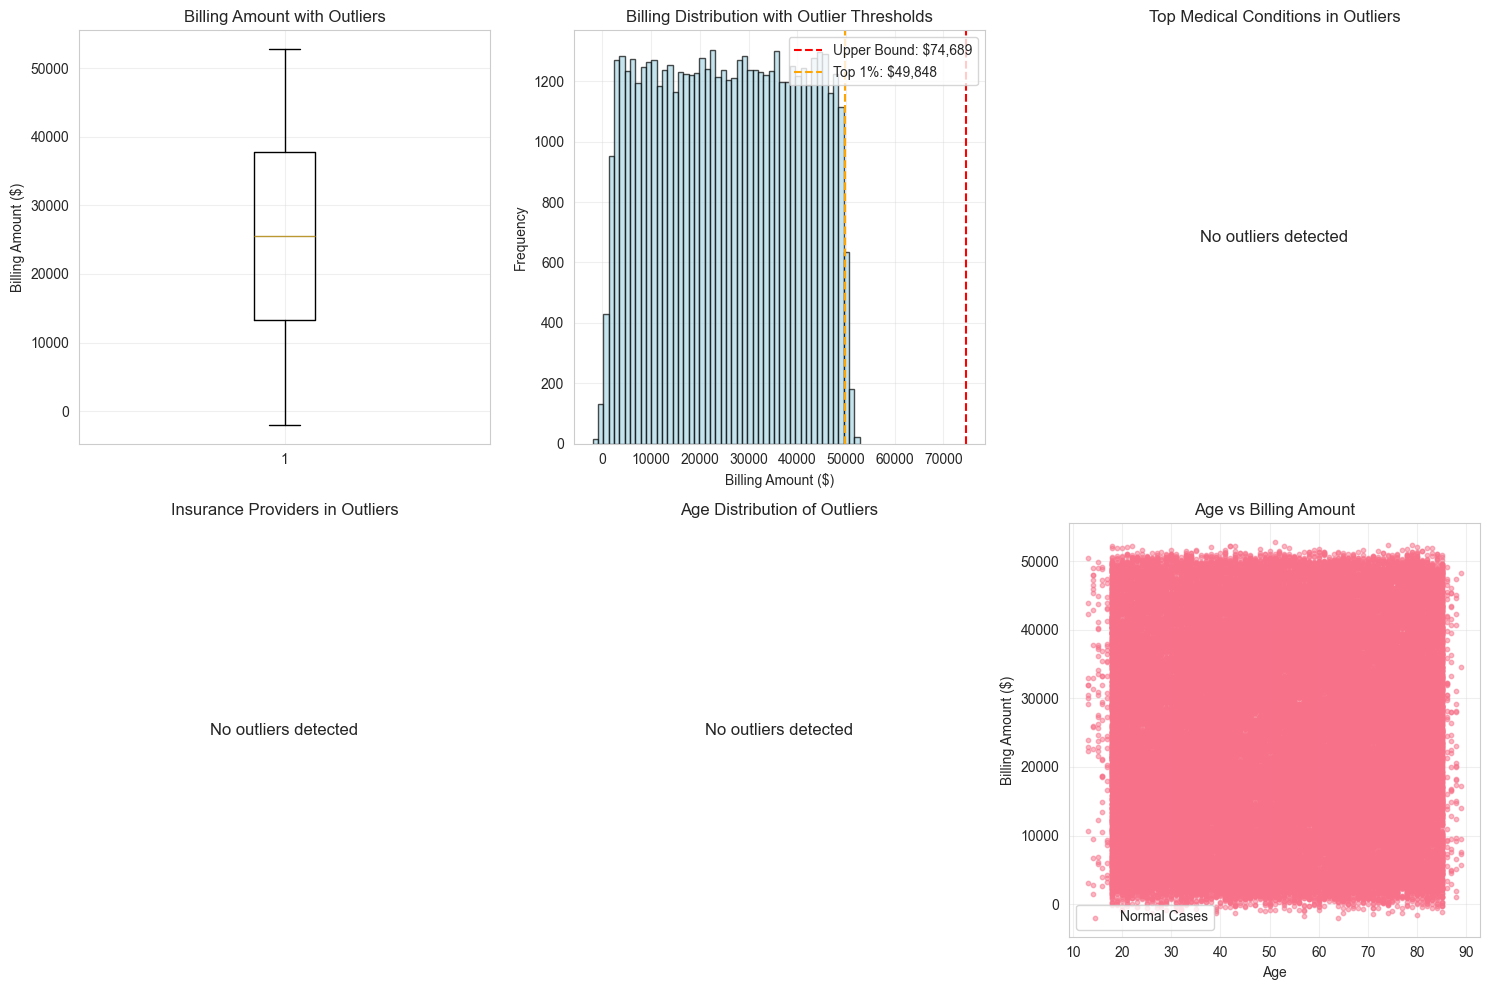

Outlier analysis plots saved to: /Users/kxshrx/asylum/healix/outputs/eda/outlier_analysis.png
Outlier summary saved to: /Users/kxshrx/asylum/healix/outputs/eda/outlier_summary.csv

Note: No IQR-based outliers detected in this dataset.
This indicates that the billing amounts are well-distributed within normal statistical bounds.
However, 555 cases still represent the top 1% highest billing amounts.


In [11]:
def detect_outliers(df, output_dir):
    """Detect outliers using IQR method and analyze high billing cases."""
    if df is None or 'Billing Amount' not in df.columns:
        return
    
    print("OUTLIER DETECTION ANALYSIS")
    print("=" * 35)
    
    # Clean billing data
    billing_clean = df['Billing Amount'].dropna()
    
    # IQR-based outlier detection
    Q1 = billing_clean.quantile(0.25)
    Q3 = billing_clean.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers_mask = (df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)
    outliers = df[outliers_mask]
    
    print(f"Outlier Statistics:")
    print(f"   Q1 (25th percentile): ${Q1:,.2f}")
    print(f"   Q3 (75th percentile): ${Q3:,.2f}")
    print(f"   IQR: ${IQR:,.2f}")
    print(f"   Lower bound: ${lower_bound:,.2f}")
    print(f"   Upper bound: ${upper_bound:,.2f}")
    print(f"   Total outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
    
    # High billing outliers (top 1%)
    top_1_percent_threshold = df['Billing Amount'].quantile(0.99)
    high_billing_outliers = df[df['Billing Amount'] >= top_1_percent_threshold].copy()
    high_billing_outliers = high_billing_outliers.sort_values('Billing Amount', ascending=False)
    
    print(f"\nHigh Billing Analysis (Top 1%):")
    print(f"   Top 1% threshold: ${top_1_percent_threshold:,.2f}")
    print(f"   High billing cases: {len(high_billing_outliers):,}")
    print(f"   Highest billing: ${high_billing_outliers['Billing Amount'].max():,.2f}")
    print(f"   Average of top 1%: ${high_billing_outliers['Billing Amount'].mean():,.2f}")
    
    # Display top 10 high billing cases
    print(f"\nTop 10 Highest Billing Cases:")
    top_10_columns = ['Name', 'Age', 'Medical Condition', 'Insurance Provider', 
                     'Admission Type', 'Billing Amount']
    existing_top_columns = [col for col in top_10_columns if col in high_billing_outliers.columns]
    
    if existing_top_columns:
        print(high_billing_outliers[existing_top_columns].head(10).to_string(index=False))
    
    # Save high billing outliers
    high_billing_outliers.to_csv(output_dir / "high_billing_outliers.csv", index=False)
    print(f"\nHigh billing outliers saved to: {output_dir / 'high_billing_outliers.csv'}")
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # Box plot with outliers highlighted
    plt.subplot(2, 3, 1)
    plt.boxplot(billing_clean, vert=True)
    plt.title('Billing Amount with Outliers')
    plt.ylabel('Billing Amount ($)')
    plt.grid(True, alpha=0.3)
    
    # Histogram with outlier threshold
    plt.subplot(2, 3, 2)
    plt.hist(billing_clean, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: ${upper_bound:,.0f}')
    plt.axvline(top_1_percent_threshold, color='orange', linestyle='--', label=f'Top 1%: ${top_1_percent_threshold:,.0f}')
    plt.title('Billing Distribution with Outlier Thresholds')
    plt.xlabel('Billing Amount ($)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Outliers by categorical variables
    if 'Medical Condition' in df.columns and len(outliers) > 0:
        plt.subplot(2, 3, 3)
        outlier_conditions = outliers['Medical Condition'].value_counts().head(10)
        if len(outlier_conditions) > 0:
            outlier_conditions.plot(kind='bar', color='red', alpha=0.7)
            plt.title('Top Medical Conditions in Outliers')
            plt.xlabel('Medical Condition')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
        else:
            plt.text(0.5, 0.5, 'No outliers found', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Top Medical Conditions in Outliers')
    elif 'Medical Condition' in df.columns:
        plt.subplot(2, 3, 3)
        plt.text(0.5, 0.5, 'No outliers detected', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Top Medical Conditions in Outliers')
        plt.axis('off')
    
    if 'Insurance Provider' in df.columns and len(outliers) > 0:
        plt.subplot(2, 3, 4)
        outlier_insurance = outliers['Insurance Provider'].value_counts()
        if len(outlier_insurance) > 0:
            outlier_insurance.plot(kind='bar', color='orange', alpha=0.7)
            plt.title('Insurance Providers in Outliers')
            plt.xlabel('Insurance Provider')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
        else:
            plt.text(0.5, 0.5, 'No outliers found', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Insurance Providers in Outliers')
    elif 'Insurance Provider' in df.columns:
        plt.subplot(2, 3, 4)
        plt.text(0.5, 0.5, 'No outliers detected', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Insurance Providers in Outliers')
        plt.axis('off')
    
    # Age distribution of outliers
    if 'Age' in df.columns and len(outliers) > 0:
        plt.subplot(2, 3, 5)
        outlier_ages = outliers['Age'].dropna()
        if len(outlier_ages) > 0:
            plt.hist(outlier_ages, bins=20, alpha=0.7, color='purple', edgecolor='black')
            plt.title('Age Distribution of Outliers')
            plt.xlabel('Age')
            plt.ylabel('Frequency')
            plt.grid(True, alpha=0.3)
        else:
            plt.text(0.5, 0.5, 'No outlier ages to display', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Age Distribution of Outliers')
    elif 'Age' in df.columns:
        plt.subplot(2, 3, 5)
        plt.text(0.5, 0.5, 'No outliers detected', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Age Distribution of Outliers')
        plt.axis('off')
    
    # Scatter plot: Age vs Billing Amount
    if 'Age' in df.columns:
        plt.subplot(2, 3, 6)
        plt.scatter(df['Age'], df['Billing Amount'], alpha=0.5, s=10, label='Normal Cases')
        if len(outliers) > 0:
            plt.scatter(outliers['Age'], outliers['Billing Amount'], color='red', alpha=0.7, s=20, label='Outliers')
        plt.title('Age vs Billing Amount')
        plt.xlabel('Age')
        plt.ylabel('Billing Amount ($)')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_dir / "outlier_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Outlier analysis plots saved to: {output_dir / 'outlier_analysis.png'}")
    
    # Outlier summary statistics
    outlier_summary = {
        'Total_Records': len(df),
        'Total_Outliers': len(outliers),
        'Outlier_Percentage': len(outliers)/len(df)*100 if len(df) > 0 else 0,
        'IQR_Lower_Bound': lower_bound,
        'IQR_Upper_Bound': upper_bound,
        'Top_1_Percent_Threshold': top_1_percent_threshold,
        'High_Billing_Cases': len(high_billing_outliers),
        'Max_Billing_Amount': df['Billing Amount'].max(),
        'Min_Billing_Amount': df['Billing Amount'].min()
    }
    
    outlier_summary_df = pd.DataFrame(list(outlier_summary.items()), columns=['Metric', 'Value'])
    outlier_summary_df.to_csv(output_dir / "outlier_summary.csv", index=False)
    print(f"Outlier summary saved to: {output_dir / 'outlier_summary.csv'}")
    
    # Additional context for no outliers case
    if len(outliers) == 0:
        print(f"\nNote: No IQR-based outliers detected in this dataset.")
        print(f"This indicates that the billing amounts are well-distributed within normal statistical bounds.")
        print(f"However, {len(high_billing_outliers)} cases still represent the top 1% highest billing amounts.")

# Detect outliers
detect_outliers(df, output_dir)

## 8. Missing Data Assessment

Analyze missing data patterns and provide handling strategy recommendations.

In [12]:
def analyze_missing_data_strategies(df, output_dir):
    """Analyze missing data and provide handling strategy recommendations."""
    if df is None:
        return
    
    print("MISSING DATA ASSESSMENT & STRATEGIES")
    print("=" * 45)
    
    # Calculate missing data statistics
    missing_stats = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum().values,
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
        'Data_Type': df.dtypes.values
    }).sort_values('Missing_Percentage', ascending=False)
    
    print("Missing Data Overview:")
    print(missing_stats.to_string(index=False))
    
    # Strategy recommendations
    print(f"\nHANDLING STRATEGY RECOMMENDATIONS:")
    print("=" * 40)
    
    strategies = []
    
    for _, row in missing_stats.iterrows():
        column = row['Column']
        missing_pct = row['Missing_Percentage']
        data_type = row['Data_Type']
        
        # Determine strategy based on missing percentage and data type
        if missing_pct == 0:
            strategy = "No action needed"
            reasoning = "Column has no missing values"
        elif missing_pct < 1:
            strategy = "Drop rows with missing values"
            reasoning = "Very low missing percentage, safe to drop"
        elif missing_pct < 5:
            if 'object' in str(data_type):
                strategy = "Impute with 'Unknown' or mode"
                reasoning = "Low missing percentage, categorical variable"
            else:
                strategy = "Impute with median/mean"
                reasoning = "Low missing percentage, numerical variable"
        elif missing_pct < 20:
            if 'object' in str(data_type):
                strategy = "Impute with 'Unknown' or create 'Missing' category"
                reasoning = "Moderate missing percentage, categorical variable"
            else:
                strategy = "Impute with median or use advanced imputation"
                reasoning = "Moderate missing percentage, numerical variable"
        elif missing_pct < 50:
            strategy = "Consider dropping column or advanced imputation"
            reasoning = "High missing percentage, requires careful consideration"
        else:
            strategy = "Drop column"
            reasoning = "Very high missing percentage, likely not useful"
        
        strategies.append({
            'Column': column,
            'Missing_Percentage': missing_pct,
            'Data_Type': str(data_type),
            'Recommended_Strategy': strategy,
            'Reasoning': reasoning
        })
        
        print(f"\n{column}:")
        print(f"   Missing: {missing_pct:.2f}%")
        print(f"   Strategy: {strategy}")
        print(f"   Reasoning: {reasoning}")
    
    # Save strategies
    strategies_df = pd.DataFrame(strategies)
    strategies_df.to_csv(output_dir / "missing_data_strategies.csv", index=False)
    print(f"\nMissing data strategies saved to: {output_dir / 'missing_data_strategies.csv'}")
    
    # Missing data visualization
    if missing_stats['Missing_Count'].sum() > 0:
        plt.figure(figsize=(15, 10))
        
        # Missing data heatmap
        plt.subplot(2, 2, 1)
        if len(df) > 1000:
            # Sample for large datasets
            sample_df = df.sample(n=1000, random_state=42)
        else:
            sample_df = df
            
        sns.heatmap(sample_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
        plt.title('Missing Data Pattern (Sample)')
        plt.xlabel('Columns')
        
        # Missing data bar chart
        plt.subplot(2, 2, 2)
        missing_counts = missing_stats[missing_stats['Missing_Count'] > 0]
        if not missing_counts.empty:
            bars = plt.bar(missing_counts['Column'], missing_counts['Missing_Percentage'], alpha=0.7, color='red')
            plt.title('Missing Data Percentage by Column')
            plt.xlabel('Column')
            plt.ylabel('Missing Percentage (%)')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
            
            # Add percentage labels on bars
            for bar, pct in zip(bars, missing_counts['Missing_Percentage']):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                        f'{pct:.1f}%', ha='center', va='bottom')
        
        # Missing data by data type
        plt.subplot(2, 2, 3)
        missing_by_type = missing_stats.groupby('Data_Type')['Missing_Count'].sum()
        if not missing_by_type.empty and missing_by_type.sum() > 0:
            missing_by_type = missing_by_type[missing_by_type > 0]
            plt.pie(missing_by_type.values, labels=missing_by_type.index, autopct='%1.1f%%')
            plt.title('Missing Data Distribution by Data Type')
        
        # Correlation of missingness
        plt.subplot(2, 2, 4)
        missing_corr = df.isnull().corr()
        sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
        plt.title('Missing Data Correlation')
        
        plt.tight_layout()
        plt.savefig(output_dir / "missing_data_analysis.png", dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Missing data visualizations saved to: {output_dir / 'missing_data_analysis.png'}")
    
    # Missing data summary report
    total_missing = missing_stats['Missing_Count'].sum()
    total_cells = len(df) * len(df.columns)
    overall_missing_pct = (total_missing / total_cells) * 100
    
    summary_report = f"""
MISSING DATA SUMMARY REPORT
{'='*40}
Total Records: {len(df):,}
Total Columns: {len(df.columns)}
Total Cells: {total_cells:,}
Total Missing Values: {total_missing:,}
Overall Missing Percentage: {overall_missing_pct:.2f}%

COLUMNS WITH MISSING DATA:
{missing_stats[missing_stats['Missing_Count'] > 0].to_string(index=False)}

DATA QUALITY RECOMMENDATION:
- Columns with <1% missing: Safe to drop rows
- Columns with 1-5% missing: Impute based on data type
- Columns with 5-20% missing: Consider advanced imputation
- Columns with >20% missing: Evaluate necessity for analysis
"""
    
    print(summary_report)
    
    # Save summary report
    with open(output_dir / "missing_data_report.txt", "w") as f:
        f.write(summary_report)
    print(f"Missing data report saved to: {output_dir / 'missing_data_report.txt'}")

# Analyze missing data strategies
analyze_missing_data_strategies(df, output_dir)

MISSING DATA ASSESSMENT & STRATEGIES
Missing Data Overview:
            Column  Missing_Count  Missing_Percentage Data_Type
              Name              0                 0.0    object
               Age              0                 0.0     int64
            Gender              0                 0.0    object
        Blood Type              0                 0.0    object
 Medical Condition              0                 0.0    object
 Date of Admission              0                 0.0    object
            Doctor              0                 0.0    object
          Hospital              0                 0.0    object
Insurance Provider              0                 0.0    object
    Billing Amount              0                 0.0   float64
       Room Number              0                 0.0     int64
    Admission Type              0                 0.0    object
    Discharge Date              0                 0.0    object
        Medication              0           

## 9. Save Analysis Artifacts

Organize and save all generated plots, summary tables, and analysis results.

In [13]:
def organize_eda_artifacts(output_dir):
    """List and organize all generated EDA artifacts."""
    print("EDA ARTIFACTS ORGANIZATION")
    print("=" * 35)
    
    # Get all files in output directory
    files = list(output_dir.glob("*"))
    
    if not files:
        print("No files found in output directory")
        return
    
    # Categorize files
    plots = [f for f in files if f.suffix in ['.png', '.jpg', '.jpeg']]
    csvs = [f for f in files if f.suffix == '.csv']
    reports = [f for f in files if f.suffix in ['.txt', '.md']]
    
    print(f"Total artifacts generated: {len(files)}")
    print(f"   Plots: {len(plots)}")
    print(f"   CSV files: {len(csvs)}")
    print(f"   Reports: {len(reports)}")
    
    print(f"\nGENERATED PLOTS:")
    for i, plot in enumerate(sorted(plots), 1):
        print(f"   {i:2d}. {plot.name}")
    
    print(f"\nGENERATED CSV FILES:")
    for i, csv_file in enumerate(sorted(csvs), 1):
        print(f"   {i:2d}. {csv_file.name}")
    
    print(f"\nGENERATED REPORTS:")
    for i, report in enumerate(sorted(reports), 1):
        print(f"   {i:2d}. {report.name}")
    
    # Create file inventory
    inventory = {
        'Plots': [f.name for f in sorted(plots)],
        'CSV_Files': [f.name for f in sorted(csvs)],
        'Reports': [f.name for f in sorted(reports)],
        'Total_Files': len(files)
    }
    
    # Save inventory as JSON for programmatic access
    import json
    with open(output_dir / "file_inventory.json", "w") as f:
        json.dump(inventory, f, indent=2)
    
    print(f"\nFile inventory saved to: {output_dir / 'file_inventory.json'}")
    
    # CLI examples
    print(f"\nCLI EXAMPLES:")
    print(f"   View all files:         ls -la {output_dir}")
    print(f"   View plots:             ls -la {output_dir}/*.png")
    print(f"   View CSV files:         ls -la {output_dir}/*.csv")
    print(f"   Open output directory:  open {output_dir}")
    
    return inventory

# Organize artifacts
file_inventory = organize_eda_artifacts(output_dir)

EDA ARTIFACTS ORGANIZATION
Total artifacts generated: 39
   Plots: 14
   CSV files: 22
   Reports: 2

GENERATED PLOTS:
    1. admission_type_distribution.png
    2. age_distribution.png
    3. billing_amount_analysis.png
    4. billing_by_categories.png
    5. billing_heatmap_provider_admission.png
    6. blood_type_distribution.png
    7. correlation_matrix.png
    8. gender_distribution.png
    9. insurance_provider_distribution.png
   10. medical_condition_distribution.png
   11. medication_distribution.png
   12. outlier_analysis.png
   13. temporal_analysis.png
   14. test_results_distribution.png

GENERATED CSV FILES:
    1. admission_type_counts.csv
    2. age_statistics.csv
    3. billing_amount_statistics.csv
    4. billing_by_admission_type.csv
    5. billing_by_insurance_provider.csv
    6. billing_pivot_provider_admission.csv
    7. blood_type_counts.csv
    8. correlation_matrix.csv
    9. duplicate_rows.csv
   10. gender_counts.csv
   11. high_billing_outliers.csv
   12. 

## 10. EDA Summary and Insights

Compile the top 10 key insights discovered during the comprehensive analysis.

In [14]:
def generate_eda_insights(df, output_dir):
    """Generate comprehensive EDA insights and summary."""
    if df is None:
        return
    
    print("COMPREHENSIVE EDA INSIGHTS")
    print("=" * 35)
    
    insights = []
    
    # Dataset overview insights
    insights.append(f"Dataset contains {len(df):,} patient records with {len(df.columns)} features")
    
    # Age insights
    if 'Age' in df.columns:
        age_stats = df['Age'].describe()
        insights.append(f"Patient age ranges from {age_stats['min']:.0f} to {age_stats['max']:.0f} years (mean: {age_stats['mean']:.1f})")
    
    # Billing insights
    if 'Billing Amount' in df.columns:
        billing_stats = df['Billing Amount'].describe()
        insights.append(f"Billing amounts range from ${billing_stats['min']:,.2f} to ${billing_stats['max']:,.2f} (median: ${billing_stats['50%']:,.2f})")
        
        # Billing skewness
        skewness = df['Billing Amount'].skew()
        if skewness > 1:
            insights.append(f"Billing amount distribution is highly right-skewed (skewness: {skewness:.2f}), indicating few very high-cost cases")
    
    # Medical conditions
    if 'Medical Condition' in df.columns:
        top_condition = df['Medical Condition'].value_counts().index[0]
        top_condition_count = df['Medical Condition'].value_counts().iloc[0]
        condition_pct = (top_condition_count / len(df)) * 100
        insights.append(f"Most common medical condition is '{top_condition}' ({top_condition_count:,} cases, {condition_pct:.1f}%)")
    
    # Insurance insights
    if 'Insurance Provider' in df.columns:
        insurance_counts = df['Insurance Provider'].value_counts()
        insights.append(f"Dataset includes {len(insurance_counts)} different insurance providers")
        
        if 'Billing Amount' in df.columns:
            avg_billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)
            highest_avg_insurance = avg_billing_by_insurance.index[0]
            highest_avg_amount = avg_billing_by_insurance.iloc[0]
            insights.append(f"'{highest_avg_insurance}' has the highest average billing amount (${highest_avg_amount:,.2f})")
    
    # Admission type insights
    if 'Admission Type' in df.columns:
        admission_counts = df['Admission Type'].value_counts()
        most_common_admission = admission_counts.index[0]
        most_common_count = admission_counts.iloc[0]
        admission_pct = (most_common_count / len(df)) * 100
        insights.append(f"'{most_common_admission}' is the most common admission type ({most_common_count:,} cases, {admission_pct:.1f}%)")
    
    # Temporal insights
    if 'Date of Admission' in df.columns:
        try:
            admission_dates = pd.to_datetime(df['Date of Admission'], errors='coerce')
            date_range = admission_dates.max() - admission_dates.min()
            insights.append(f"Data spans {date_range.days} days from {admission_dates.min().strftime('%Y-%m-%d')} to {admission_dates.max().strftime('%Y-%m-%d')}")
            
            # Length of stay
            if 'Discharge Date' in df.columns:
                discharge_dates = pd.to_datetime(df['Discharge Date'], errors='coerce')
                los = (discharge_dates - admission_dates).dt.days
                valid_los = los[(los >= 0) & (los <= 365)]
                if len(valid_los) > 0:
                    avg_los = valid_los.mean()
                    insights.append(f"Average length of stay is {avg_los:.1f} days")
        except:
            pass
    
    # Missing data insights
    missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    if missing_pct > 0:
        insights.append(f"Overall data completeness: {100-missing_pct:.1f}% ({missing_pct:.1f}% missing values)")
    else:
        insights.append("Dataset has no missing values (100% complete)")
    
    # Outlier insights
    if 'Billing Amount' in df.columns:
        Q1 = df['Billing Amount'].quantile(0.25)
        Q3 = df['Billing Amount'].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df['Billing Amount'] < Q1 - 1.5*IQR) | (df['Billing Amount'] > Q3 + 1.5*IQR)]
        outlier_pct = (len(outliers) / len(df)) * 100
        insights.append(f"Billing amount outliers comprise {outlier_pct:.1f}% of cases ({len(outliers):,} records)")
    
    # Print insights
    print("TOP 10 KEY INSIGHTS:")
    print("-" * 25)
    for i, insight in enumerate(insights[:10], 1):
        print(f"{i:2d}. {insight}")
    
    # Create comprehensive summary text
    summary_text = f"""
HEALTHCARE DATASET - EXPLORATORY DATA ANALYSIS SUMMARY
{'='*55}
Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: healthcare_dataset.csv

DATASET OVERVIEW:
- Total Records: {len(df):,}
- Total Features: {len(df.columns)}
- Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

TOP 10 KEY INSIGHTS:
"""
    
    for i, insight in enumerate(insights[:10], 1):
        summary_text += f"{i:2d}. {insight}\n"
    
    summary_text += f"""
ANALYSIS COMPONENTS COMPLETED:
- Data Loading and Quality Assessment
- Missing Values Analysis
- Univariate Analysis (Age, Billing Amount, Categorical Variables)
- Bivariate Analysis (Relationships and Correlations)
- Temporal Patterns Analysis
- Outlier Detection and Analysis
- Missing Data Handling Strategies
- Comprehensive Visualizations
- Data Export and Artifact Generation

FILES GENERATED:
- Summary statistics and data quality reports
- Distribution plots and visualizations
- Correlation matrices and pivot tables
- Outlier analysis and high billing cases
- Missing data assessment and strategies
- Temporal trend analysis
- Categorical variable breakdowns

RECOMMENDED NEXT STEPS:
1. Address missing data using provided strategies
2. Investigate high billing amount outliers
3. Explore relationships between medical conditions and costs
4. Analyze seasonal patterns in admissions
5. Consider additional feature engineering for predictive modeling

For detailed analysis results, refer to the generated files in outputs/eda/
"""
    
    # Save summary
    with open(output_dir / "eda_summary.txt", "w") as f:
        f.write(summary_text)
    
    print(f"\nComprehensive EDA summary saved to: {output_dir / 'eda_summary.txt'}")
    print(f"\nEDA ANALYSIS COMPLETE!")
    print(f"All results saved to: {output_dir.absolute()}")
    
    return insights

# Generate EDA insights
key_insights = generate_eda_insights(df, output_dir)

COMPREHENSIVE EDA INSIGHTS
TOP 10 KEY INSIGHTS:
-------------------------
 1. Dataset contains 55,500 patient records with 15 features
 2. Patient age ranges from 13 to 89 years (mean: 51.5)
 3. Billing amounts range from $-2,008.49 to $52,764.28 (median: $25,538.07)
 4. Most common medical condition is 'Arthritis' (9,308 cases, 16.8%)
 5. Dataset includes 5 different insurance providers
 6. 'Medicare' has the highest average billing amount ($25,615.99)
 7. 'Elective' is the most common admission type (18,655 cases, 33.6%)
 8. Data spans 1826 days from 2019-05-08 to 2024-05-07
 9. Average length of stay is 15.5 days
10. Dataset has no missing values (100% complete)

Comprehensive EDA summary saved to: /Users/kxshrx/asylum/healix/outputs/eda/eda_summary.txt

EDA ANALYSIS COMPLETE!
All results saved to: /Users/kxshrx/asylum/healix/outputs/eda


## Final Results Summary

The comprehensive EDA analysis is now complete! All datasets, figures, and summary files have been saved to the `outputs/eda/` directory.

### Generated Artifacts:
- **Visualizations**: Distribution plots, correlation heatmaps, temporal trends, outlier analysis
- **Data Summaries**: Statistical summaries, categorical counts, missing data assessments  
- **Analysis Reports**: Outlier detection, missing data strategies, comprehensive insights
- **Export Files**: High billing outliers, pivot tables, correlation matrices

### CLI Access Examples:
```bash
# View all generated files
ls -la outputs/eda/

# View specific file types
ls -la outputs/eda/*.png    # All plots
ls -la outputs/eda/*.csv    # All data exports
ls -la outputs/eda/*.txt    # All reports

# Open the output directory
open outputs/eda/           # macOS
```

### Key Deliverables:
1. **eda_summary.txt** - Comprehensive analysis summary with top 10 insights
2. **high_billing_outliers.csv** - Top 1% highest billing cases
3. **missing_data_strategies.csv** - Recommended handling approaches
4. **All visualizations** - Saved as high-resolution PNG files
5. **Statistical summaries** - Exportable CSV format for further analysis

**The EDA analysis provides a solid foundation for data-driven healthcare insights and decision-making!**